# Video Game Sales
* **Objective:** data cleaning, manipulation, analysis and visualisation using Numpy, Pandas, Matplotlib and Seaborn.
* **Dataset:** list of video games which sold more than 100,000 copies. Retrieved from https://www.kaggle.com/gregorut/videogamesales.

## First steps: import the packages, the data and get an overview of it.

In [4]:
# Import Pandas, Matplotlib and Seaborn and set matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Read the data into a DataFrame and display its shape
vgsales_data = pd.read_csv("vgsales.csv")
vgsales_data.shape

(16598, 11)

In [6]:
# Display the first 5 rows
vgsales_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


It's interesting to note that Nintendo published the 5 best selling games worldwide. This aspect should be explored later.

In [7]:
# Display the last 5 rows
vgsales_data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


While Nintendo published the 5 best selling games, all releases on their platforms (i.e. GBA) don't seem to be quite as successful. This should also be explored.

In [8]:
# Display summary statistics about the data
vgsales_data.describe()

/Users/oliver/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


The Year column contains missing values; we should check why these are missing and fill them in, as information about release years shouldn't be too difficult to find. All other numerical columns contain no missing values.

In [9]:
# Display the data type of each column
vgsales_data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

No surprises here; we won't need to convert any columns to other types. Next we check if any of the non-numeric columns are missing values.

In [10]:
# List of non-numeric column names
nn_columns = ["Name","Platform","Genre","Publisher"]

# For each column name in the list above
for column in nn_columns:
    # Check if the column is missing any values:
    if vgsales_data[vgsales_data[column].isnull()].shape[0] > 0:
        # If it does, print this
        print(column, "contains missing values")
    else:
        # Else print this
        print(column, "doesn't contain missing values")

('Name', "doesn't contain missing values")
('Platform', "doesn't contain missing values")
('Genre', "doesn't contain missing values")
('Publisher', 'contains missing values')


The Publisher column seems to be missing some values. Let's explore this.

In [11]:
# Display summary statistics of the rows which contain a missing value in the Publisher column
vgsales_data[vgsales_data["Publisher"].isnull()].describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,58.000000,36.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,10127.879310,2006.805556,0.147241,0.080690,0.016034,0.011552,0.256552
std,4811.947755,4.020088,0.271570,0.164795,0.044640,0.055085,0.465183
min,471.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,6585.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.022500
50%,9635.000000,NaN,0.055000,0.030000,0.000000,0.000000,0.125000
75%,14884.000000,NaN,0.157500,0.070000,0.000000,0.000000,0.257500
max,16556.000000,2016.000000,1.570000,1.020000,0.270000,0.410000,3.000000


These games are not highly ranked (the highest rank being 471); nor do they sell many copies. As a result, as for the sake of time, we will drop them in the next section.

## Data cleaning: solve any missing values issues.
We saw above that the Year column contains missing values. Let's explore this.

In [12]:
# Display the rows which are missing the Year value
vgsales_data[vgsales_data["Year"].isnull()].shape

(271, 11)

In [13]:
# Display summary statistics of the rows with missing values in the Year column
vgsales_data[vgsales_data["Year"].isnull()].describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,271.000000,0.0,271.000000,271.000000,271.000000,271.000000,271.000000
mean,8766.741697,NaN,0.219631,0.092288,0.024797,0.032251,0.369299
std,4727.830597,NaN,0.425674,0.209604,0.089839,0.075893,0.615113
min,180.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4901.500000,NaN,0.010000,0.000000,0.000000,0.000000,0.055000
50%,8622.000000,NaN,0.090000,0.020000,0.000000,0.010000,0.160000
75%,12818.000000,NaN,0.240000,0.100000,0.000000,0.030000,0.395000
max,16496.000000,NaN,4.260000,2.360000,0.770000,0.710000,5.230000


Ideally, we should fill in the missing values as they shouldn't be too hard to find. However, filling them in manually would take some time (271 values to find) and not be very useful. As the concerned games are not among the highest ranked (starting at 179), we can simply drop all these rows, along with the rows missing the Publisher value.

In [14]:
# Drop the rows with missing Year values and display the shape of the new DataFrame
vgsales_clean = vgsales_data.dropna()
vgsales_clean.shape

(16291, 11)

In [15]:
# Describe the data again
vgsales_clean.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Finally, we can reindex our DataFrame, taking into account the rows we've removed.

In [16]:
# Set Rank as the index
vgsales_clean.set_index("Rank", inplace=True)

In [17]:
# Reindex the DataFrame to account for the missing rows
vgsales_clean.reindex()

# Display the first 5 rows
vgsales_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Our data is clean! We can start exploring it.

## Data Exploration
Let's start by visualising high-level trends.

### Global Sales Distribution
Let's start by analysing the distribution of Global Sales, using Pandas' built-in plotting capabilities.

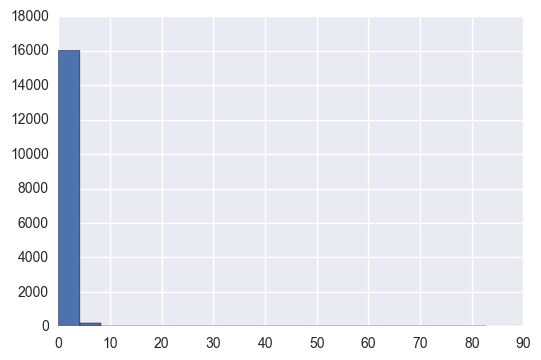

In [18]:
# Generate a histogram based on Global Sales
vgsales_clean["Global_Sales"].hist(bins=20)

A very (very) high proportion of games sell close to no games at all. Only few games manage to sell above 10m copies. Let's find these games.

In [19]:
# Find the games with a Global_Sales value higher than 10m
high_sales = vgsales_clean[vgsales_clean["Global_Sales"] > 10]

# Display the shape of the filtered DataFrame
high_sales.shape

(62, 10)

Only 62 games have sold more than 10m copies since 1980. Let's check the distribution of their sales.

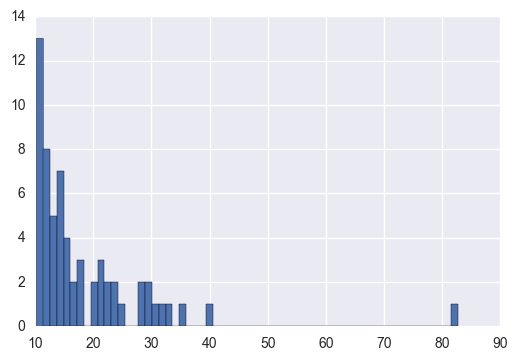

In [20]:
# Display a histogram of the distribution of Global_Sales for games which sold over 10m copies worldwide
high_sales["Global_Sales"].hist(bins=high_sales.shape[0])

Here again, the number of copies sold tends to decrease rapidly. *Wii Sports* is the outlier here – it's the third best selling game ever, behind Tetris and Minecraft, neither of which is included in the data; why not should be explored.

### Distribution Across Platforms
Let's see how sales are distributed across the platforms. As we'll be doing the same for Genre and Published, let's define a function which returns a bar chart of Global_Sales by a specified column, using Matplotlib's high-level functions.

In [21]:
# Define gsales_barchart, which takes a column name (string) and a number as parameter and returns a bar chart of global sales for that column, keeping the n first rows if specified
def gsales_barchart(column, n=None):
    # Sum the Global_Sales column for each value in the specified column and sort the Series
    gsales_by_column = vgsales_clean.pivot_table(values="Global_Sales", index=column, aggfunc=sum)
    # Sort the series
    gsales_by_column = gsales_by_column.sort_values(ascending=False)
    # If first is None, display all values of the column
    if n is not None:
        # Filter to the first n rows
        gsales_by_column = gsales_by_column.head(n)
    # Find the x coordinates for the bars
    loc = np.arange(len(vgsales_clean[column].unique()))
    # Create a bar chart
    plt.bar(left=loc, width=0.8, height=gsales_by_column, align="center")
    # Set the number of ticks
    plt.xticks(loc, gsales_by_column.index, rotation=90)
    # Display the bar chart
    plt.show()

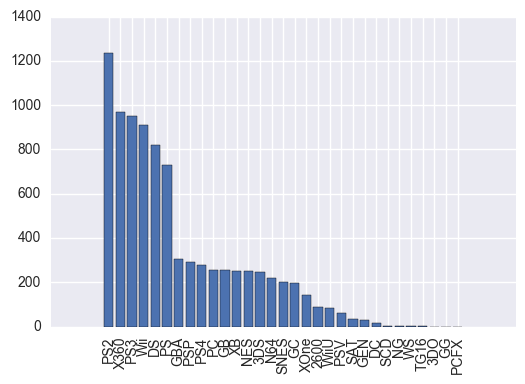

In [22]:
# Display the Global_Sales by platform
gsales_barchart("Platform")

6 platforms sold significantly more games worldwide than the others (PS2, X360, PS3, Wii, DS and PS). Despite 3 of the 5 most successful games worldwide being on Wii, PS2 is far ahead. Among last-generation platforms, the PS4 is ahead, followed by the Xbox One and WiiU. **Idea:** PC gamers might play different games than console gamers. Find the most successful genres on PCs and check if PC sales are higher in certain categories.

*Ran into a few issues here:*
* Setting plt.bar's align parameter to "center" create the space on the left, not sure why
* Can't figure out how to increase the size of the figure using plt's high-level methods
* Related to figure size; bars should be set wider apart to allow enough space for the ticks to be aligned

### Distribution Across Genres

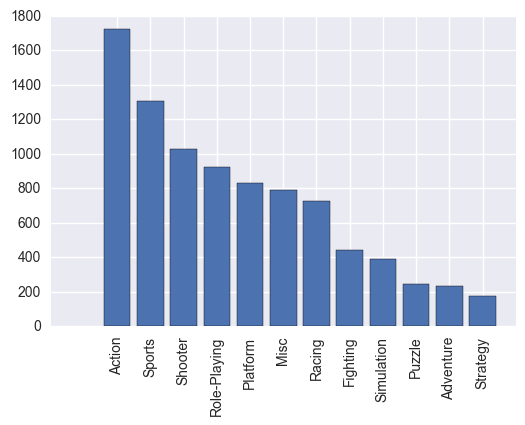

In [23]:
# Display the global sales by Genre
gsales_barchart("Genre")

Having a Misc genre could have been a problem if it had been reverted to too often. This is not the case. Action games sell the most copies, followed by Sports and Shooter.

### Distribution Across Publishers

In [24]:
# Display the number of unique values for Publisher
len(vgsales_clean["Publisher"].unique())

576

There are 576 unique values in the Published column. We'll keep only the 20 most successful publishers, or our chart will be unreadable.

In [25]:
# Display the global sales by Publisher
# gsales_barchart("Publisher", n=20)

*Specifying n doesn't seem to work – must fix the gsales_barchart function above. Until then, the analysis below was 
done when all the charts were created using Pandas' built-in methods.*

Sales by published follow the same trend as in all the cases above: a few very successful publishers sell a vast majority of games worldwide. Nintendo come first, followed by Electronic Arts and Activision. For each of these publishers, let's find their most successful games.

In [26]:
# Define a function which takes a publisher name as parameter and returns the publisher's x most successful games.
def games_per_publisher(publisher, number=5):
    # Filter the DataFrame to keep only the games sold by the publisher
    vgsales_filtered = vgsales_clean[vgsales_clean["Publisher"] == publisher]
    # Return the first [number] games
    return vgsales_filtered.head(number)

In [27]:
# Display Nintendo's most successful games
games_per_publisher("Nintendo")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
# Display Electronic Arts' most successful games
games_per_publisher("Electronic Arts")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34


In [29]:
# Display Activision's most successful games
games_per_publisher("Activision")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73


It's interesting that Electronic Arts sell more copies globally than Activision, despite having lower ranked games. This can be explained by Activition's focus on a single game series (Call of Duty) – and perhaps World of Warcraft; which contrasts with EA's multitude of successful series (FIFA, The Sims, Battlefield).

# Next Steps
* How are sales distributed around the world?
    * Does this distribution depend on other columns (i.e. Genre)?
* How are sales distributed across platform manufacturers?
* Are global sales correlated with any other column (other than local sales)?
* For a multi-platform game, which platform tends to generate the most sales?